In [170]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from config import *

## **Test/Positve dataset**

1. **Dataset before 2020-05-12**

In [102]:
url_test1="https://www.data.gouv.fr/fr/datasets/r/b4ea7b4b-b7d1-4885-a099-71852291ff20"
dtype={'dep': str,'clage_covid':str,'nb_test':int,'nb_pos':int}
df_test1=pd.read_csv(url_test1,sep = ';',dtype=dtype)
df_test1=df_test1.drop(["nb_test_h","nb_test_f","nb_pos_h","nb_pos_f"],axis=1)

In [103]:
df_test1=df_test1.drop(df_test1[(df_test1["jour"]<"2020-03-18") | (df_test1["jour"]>"2020-05-12")].index)
df_test1.head()

,dep,jour,clage_covid,nb_test,nb_pos
48,01,2020-03-18,0,37,8
49,01,2020-03-18,A,0,0
50,01,2020-03-18,B,15,1
51,01,2020-03-18,C,11,3
52,01,2020-03-18,D,4,3


In [104]:
df_test1=df_test1.drop(df_test1[df_test1["clage_covid"] != "0"].index)
df_test1=df_test1.drop("clage_covid",axis=1)
df_test1.head()

,dep,jour,nb_test,nb_pos
48,01,2020-03-18,37,8
54,01,2020-03-19,82,13
60,01,2020-03-20,44,9
66,01,2020-03-21,13,1
72,01,2020-03-22,4,0


2. **Dataset after 2020-05-12**

In [105]:
url_test2="https://www.data.gouv.fr/fr/datasets/r/406c6a23-e283-4300-9484-54e78c8ae675"
dtype={'dep': str,'P':int,'T':int,'cl_age':int}
df_test2=pd.read_csv(url_test2,sep = ';',dtype=dtype)
df_test2.head()

,dep,jour,P,T,cl_age90
0,01,2020-05-13,0,16,9
1,01,2020-05-13,1,16,19
2,01,2020-05-13,0,31,29
3,01,2020-05-13,1,71,39
4,01,2020-05-13,0,52,49


In [106]:
df_test2.loc[df_test2['dep'] == '75']

,dep,jour,P,T,cl_age90
147675,75,2020-05-13,0,62,9
147676,75,2020-05-13,0,40,19
147677,75,2020-05-13,6,188,29
147678,75,2020-05-13,2,234,39
147679,75,2020-05-13,2,206,49
...,...,...,...,...,...
149639,75,2020-11-07,26,222,69
149640,75,2020-11-07,16,122,79
149641,75,2020-11-07,13,67,89
149642,75,2020-11-07,8,21,90


In [107]:
df_test2=df_test2.rename(columns={'P':'nb_pos','T':'nb_test'})
df_test2=df_test2.drop("cl_age90",axis=1)

In [108]:
df_test2=df_test2.groupby(["dep","jour"]).tail(1)
df_test2.head()

,dep,jour,nb_pos,nb_test
10,01,2020-05-13,9,324
21,01,2020-05-14,9,428
32,01,2020-05-15,5,438
43,01,2020-05-16,0,142
54,01,2020-05-17,0,30


3. **Merge in one dataset**

In [109]:
df_test = pd.concat([df_test1,df_test2],ignore_index=True)
df_test['nb_test_cum']=df_test.groupby("dep")['nb_test'].cumsum()
df_test['nb_pos_cum']=df_test.groupby("dep")['nb_pos'].cumsum()
df_test.head()

,dep,jour,nb_test,nb_pos,nb_test_cum,nb_pos_cum
0,01,2020-03-18,37,8,37,8
1,01,2020-03-19,82,13,119,21
2,01,2020-03-20,44,9,163,30
3,01,2020-03-21,13,1,176,31
4,01,2020-03-22,4,0,180,31


## **Hospital dataset**

In [110]:
url2="https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7"
df_hospital = pd.read_csv(url2,sep=';')
df_hospital.head()

,dep,sexe,jour,hosp,rea,rad,dc
0,01,0,2020-03-18,2,0,1,0
1,01,1,2020-03-18,1,0,1,0
2,01,2,2020-03-18,1,0,0,0
3,02,0,2020-03-18,41,10,18,11
4,02,1,2020-03-18,19,4,11,6


In [111]:
df_hospital = df_hospital.drop(df_hospital[(df_hospital["sexe"]==1) | (df_hospital["sexe"]==2 ) ].index).reset_index(drop=True)
df_hospital = df_hospital.drop(["sexe"],axis=1)
df_hospital.head()

,dep,jour,hosp,rea,rad,dc
0,01,2020-03-18,2,0,1,0
1,02,2020-03-18,41,10,18,11
2,03,2020-03-18,4,0,1,0
3,04,2020-03-18,3,1,2,0
4,05,2020-03-18,8,1,9,0


## **Create departement longitude/latitude Dataframe**

Source: <a href="https://www.ign.fr/sites/default/files/2020-09/Quels%20sont%20les%20centres%20des%2096%20d%C3%A9partements%20m%C3%A9tropolitains.pdf" target="_blank">https://www.ign.fr/sites/default/files/2020-09/Quels%20sont%20les%20centres%20des%2096%20d%C3%A9partements%20m%C3%A9tropolitains.pdf</a>

Source: <a href="https://www.coordonnees-gps.fr/" target="_blank">https://www.coordonnees-gps.fr/</a>

In [112]:
departements= df_test["dep"].unique()
zoom_dep=[7.5]*len(departements)
print(departements)

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '2A' '2B' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55'
 '56' '57' '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69'
 '70' '71' '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83'
 '84' '85' '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' '971' '972'
 '973' '974' '976' '975' '977' '978']


In [113]:
data={'dep':departements,
      'dep_name':['Ain','Aisne','Allier','Alpes-de-Haute-Provence','Hautes-Alpes','Alpes_Maritimes','Ardeche','Ardennes','Ariege','Aube','Aude','Aveyron','Bouches-du-Rhône','Calvados','Cantal','Charente','Charente-Maritime','Cher','Correze',"Côte-d'Or","Côtes-D'Armor","Creuse","Dordogne","Doubs","Drome","Eure","Eure-et-Loire","Finistère","Corde-du-Sud","Haute-Corse","Gard","Haute-Garonne","Gers","Gironde","Hérault","Ille-et-Vilaine","Indre","Indre-et-Loire","Isère","Jura","Landes","Loir-et-Cher","Loire","Haute-Loire","Loire-Atlantique","Loiret","Lot","Lot-et-Garonne","Lozère","Manne-et-Loire","Manche","Marne","Haute-Marne","Mayenne","Meurthe-et-Moselle","Meuse","Morbihan","Moselle","Nièvre","Nord","Oise","Orne","Pas-de-Calais","Puy-de-Dôme","Pyrénées-Altantiques","Hautes-Pyrénées","Pyrénées-Orientales","Bas-Rhin","Haut-Rhin","Rhone","Haute-Saône","Saône-et-Loire","Sarthe","Savoie","Haute-Savoie","Paris","Seine-Maritime","Seine-et-Marne","Yvellines","Deux-Sèvres","Somme","Tarn","Tarn-et-Garonne","Var","Vaucluse","Vendée","Vienne","Haute-Vienne","Vosges","Yonne","Territoire de Belfort","Essonne","Hauts-de-Seine","Seine-Saint_Denis","Val-de-Marne","Val-d'Oise","Guadeloupe","Martinique","Guyane","La Réunion","Mayotte","Saint-Pierre-et-Miquelon","Saint-Barthélémy","Saint-Martin"],
      'lat':[46.1,49.55,44.1,44.09,44.66,43.94,44.73,49.61,42.94,48.31,43.10,44.28,43.54,49.10,45.01,45.71,45.76,47.07,45.34,47.43,48.44,46.08,45.13,47.16,44.68,49.10,48.39,48.27,41.88,42.37,43.99,43.35,43.68,44.84,43.90,48.18,46.80,47.24,45.27,46.73,43.96,47.61,45.72,45.13,47.38,47.85,44.63,44.37,44.51,47.39,49.08,48.38,48.09,48.12,48.79,49.00,47.85,49.02,47.10,50.45,49.39,48.61,50.49,45.73,43.28,43.05,42.61,48.65,47.86,45.86,47.63,46.64,48.00,45.47,46.04,48.85,49.65,48.60,48.97,46.53,49.97,43.77,44.07,43.47,43.99,46.67,46.55,45.87,48.19,47.84,47.62,48.52,48.83,48.90,48.77,49.07,16.00,14.60,4.93,-20.88,-12.77,46.78,17.90,18.06],
      'long':[5.33,3.56,2.35,6.23,6.21,7.12,4.41,4.61,1.53,4.14,2.35,2.72,5.03,-0.37,2.66,0.20,-0.71,2.52,1.81,4.78,-2.85,2.04,0.70,6.37,5.15,1.00,1.36,-4.04,8.97,9.23,4.17,1.23,0.45,-0.58,4.47,-1.64,1.62,0.69,5.61,5.69,-0.80,1.41,4.16,3.81,-1.71,2.26,1.59,0.46,3.49,-0.53,-1.34,7.47,5.15,-0.67,6.16,5.39,-2.83,6.65,3.51,3.20,2.42,0.11,2.27,3.14,-0.75,0.16,2.51,7.56,7.27,4.66,6.07,4.53,0.19,6.45,6.44,2.35,1.04,2.97,1.97,-0.32,2.29,2.18,1.28,6.18,5.14,-1.28,0.50,1.23,6.37,3.57,6.92,2.26,2.24,2.48,2.45,2.17,-61.73,-61.06,-52.32,55.45,45.22,-56.19,-62.81,-63.08],
      'zoom':zoom_dep
     }
print(len(data['dep_name']))
df_coord = pd.DataFrame(data,columns=['dep','dep_name','lat','long','zoom'])
df_coord.tail()

104


,dep,dep_name,lat,long,zoom
99,974,La Réunion,-20.88,55.45,7.5
100,976,Mayotte,-12.77,45.22,7.5
101,975,Saint-Pierre-et-Miquelon,46.78,-56.19,7.5
102,977,Saint-Barthélémy,17.90,-62.81,7.5
103,978,Saint-Martin,18.06,-63.08,7.5


## **Complete Dataset**

In [114]:
df_dep = pd.merge(df_hospital,df_test,on=['dep','jour'])
df_dep = pd.merge(df_dep,df_coord,on=['dep'])
df_dep=df_dep.sort_values(['dep','jour'])

In [115]:
df_dep.head()

,dep,jour,hosp,rea,rad,dc,nb_test,nb_pos,nb_test_cum,nb_pos_cum,dep_name,lat,long,zoom
0,01,2020-03-18,2,0,1,0,37,8,37,8,Ain,46.1,5.33,7.5
1,01,2020-03-19,2,0,1,0,82,13,119,21,Ain,46.1,5.33,7.5
2,01,2020-03-20,2,0,1,0,44,9,163,30,Ain,46.1,5.33,7.5
3,01,2020-03-21,4,0,1,0,13,1,176,31,Ain,46.1,5.33,7.5
4,01,2020-03-22,8,1,2,0,4,0,180,31,Ain,46.1,5.33,7.5


In [116]:
df_dep["scaled"] = df_dep["nb_pos_cum"] ** 0.77
df_dep['death_rate']=round(df_dep['dc']/df_dep['nb_pos_cum']*100,2)
df_dep.head()

,dep,jour,hosp,rea,rad,dc,nb_test,nb_pos,nb_test_cum,nb_pos_cum,dep_name,lat,long,zoom,scaled,death_rate
0,01,2020-03-18,2,0,1,0,37,8,37,8,Ain,46.1,5.33,7.5,4.958831,0.0
1,01,2020-03-19,2,0,1,0,82,13,119,21,Ain,46.1,5.33,7.5,10.425787,0.0
2,01,2020-03-20,2,0,1,0,44,9,163,30,Ain,46.1,5.33,7.5,13.720924,0.0
3,01,2020-03-21,4,0,1,0,13,1,176,31,Ain,46.1,5.33,7.5,14.071763,0.0
4,01,2020-03-22,8,1,2,0,4,0,180,31,Ain,46.1,5.33,7.5,14.071763,0.0


In [141]:
df_dep["new_death_rate"]=df_dep.groupby("dep")["death_rate"].apply(lambda row: round(row-(row.shift(1)),2))
df_dep["new_death_rate"].fillna(df_dep["death_rate"], inplace = True) # first date, new_death_rate = death rate
df_dep["new_dc"]=df_dep.groupby("dep")["dc"].apply(lambda row: row-(row.shift(1)))
df_dep["new_dc"].fillna(df_dep["dc"], inplace = True) # first date, new_dc = dc

df_dep.head()

,dep,jour,hosp,rea,rad,dc,nb_test,nb_pos,nb_test_cum,nb_pos_cum,dep_name,lat,long,zoom,scaled,death_rate,new_death_rate,new_dc
0,01,2020-03-18,2,0,1,0,37,8,37,8,Ain,46.1,5.33,7.5,4.958831,0.0,0.0,0.0
1,01,2020-03-19,2,0,1,0,82,13,119,21,Ain,46.1,5.33,7.5,10.425787,0.0,0.0,0.0
2,01,2020-03-20,2,0,1,0,44,9,163,30,Ain,46.1,5.33,7.5,13.720924,0.0,0.0,0.0
3,01,2020-03-21,4,0,1,0,13,1,176,31,Ain,46.1,5.33,7.5,14.071763,0.0,0.0,0.0
4,01,2020-03-22,8,1,2,0,4,0,180,31,Ain,46.1,5.33,7.5,14.071763,0.0,0.0,0.0


In [142]:
df_last_update=df_dep.groupby("dep").tail(1).reset_index(drop=True)
df_last_update.head()

,dep,jour,hosp,rea,rad,dc,nb_test,nb_pos,nb_test_cum,nb_pos_cum,dep_name,lat,long,zoom,scaled,death_rate,new_death_rate,new_dc
0,01,2020-11-07,380,34,791,177,897,248,166920,24242,Ain,46.10,5.33,7.5,2377.484554,0.73,0.01,4.0
1,02,2020-11-07,206,30,1381,336,902,160,99503,8472,Aisne,49.55,3.56,7.5,1058.154734,3.97,-0.06,1.0
2,03,2020-11-07,231,22,446,106,783,127,76153,6232,Allier,44.10,2.35,7.5,835.339720,1.70,0.03,4.0
3,04,2020-11-07,103,12,231,26,88,20,40352,3004,Alpes-de-Haute-Provence,44.09,6.23,7.5,476.243372,0.87,0.03,1.0
4,05,2020-11-07,165,24,261,44,54,10,29006,3873,Hautes-Alpes,44.66,6.21,7.5,579.157351,1.14,0.03,1.0


In [160]:
y= pd.DataFrame(columns=['Departments','Confirmed','Deaths'])
y['Departments']=df_last_update['dep_name']
y['Confirmed']=df_last_update['nb_pos_cum']
y['Deaths']=df_last_update['dc']
print(y)

                 Departments  Confirmed  Deaths
0                        Ain      24242     177
1                      Aisne       8472     336
2                     Allier       6232     106
3    Alpes-de-Haute-Provence       3004      26
4               Hautes-Alpes       3873      44
..                       ...        ...     ...
96                Guadeloupe       7953     148
97                Martinique       4782      36
98                    Guyane       9833      66
99                La Réunion       6494      34
100                  Mayotte       2980      32

[101 rows x 3 columns]


In [143]:
n=df_last_update.loc[df_last_update["dep_name"]=="Aisne"]

In [144]:
print(n.iloc[0]["new_death_rate"])

-0.06


## **France dataset**

In [145]:
df_france=df_dep.groupby("jour").sum().reset_index()
df_france['death_rate']=round(df_france['dc']/df_france['nb_pos_cum']*100,2)
df_france['new_death_rate']=round(df_france.death_rate-df_france.death_rate.shift(1),2)
df_france["new_death_rate"].fillna(df_france["death_rate"], inplace = True) # first date, new_death_rate = death rate
df_france["lat"]=46.40
df_france["long"]=0.5
df_france["zoom"]=3.5

In [146]:
z=df_france.tail(1)
z.head()

,jour,hosp,rea,rad,dc,nb_test,nb_pos,nb_test_cum,nb_pos_cum,lat,long,zoom,scaled,death_rate,new_death_rate,new_dc
234,2020-11-07,29396,4410,127907,27636,90635,14694,18006138,1699770,46.4,0.5,3.5,165101.010707,1.63,0.01,304.0


#### **Plot Figures**

### **Map**

In [124]:
color_scale = ["#fadc8f",
        "#f9d67a",
        "#f8d066",
        "#f8c952",
        "#f7c33d",
        "#f6bd29",
        "#f5b614",
        "#F4B000",
        "#eaa900",
        "#e0a200",
        "#dc9e00",]



In [125]:
px.set_mapbox_access_token(MAPBOX_ACCESS_TOKEN)

In [165]:
def plot_map(lat=46.4,lon=0.5,zoom=3.5):    
    fig = px.scatter_mapbox(
        df_last_update,
        lat = "lat",
        lon = "long",
        color = "nb_pos_cum",
        size="scaled",
        size_max = 35,
        hover_name = "dep_name",
        hover_data = ["nb_pos_cum","dc","death_rate","dep_name"],
        color_continuous_scale = color_scale,
        background-color="#000000",
    )

    fig.layout.update(
            mapbox_style="dark",
            mapbox=dict(center=dict(lat=lat, lon=lon), zoom=zoom),
        )
    fig.data[0].update(
            hovertemplate=("%{customdata[3]}<br>Confirmed:"
                          " %{customdata[0]}<br>Deaths: %{customdata[1]}<br>Death Rate: %{customdata[2]}")
        )

    fig.show()

SyntaxError: keyword can't be an expression (<ipython-input-165-401d2b70b922>, line 12)

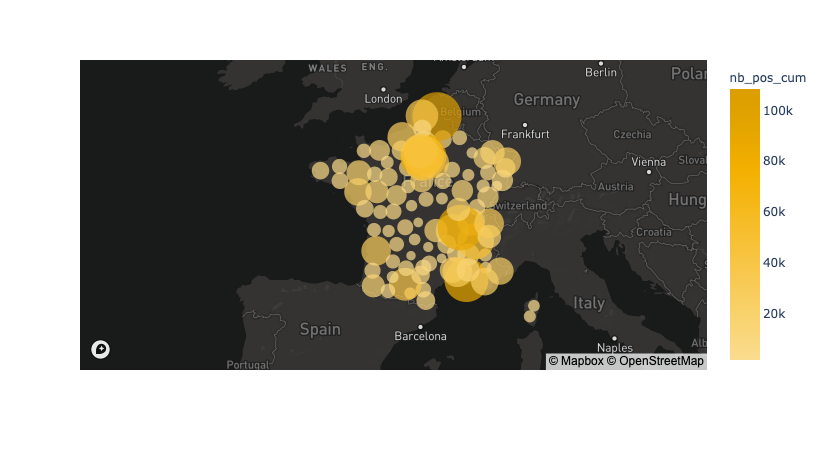

In [164]:
plot_map()

### **Graph**

In [128]:
last_days=30
select_df="departments"
dep_name = "Aisne"

In [129]:
all_df={"departments":df_dep[df_dep["dep_name"]==dep_name],"country":df_france}

In [130]:
df_france.head()

,jour,hosp,rea,rad,dc,nb_test,nb_pos,nb_test_cum,nb_pos_cum,lat,long,zoom,scaled,death_rate,new_death_rate,new_dc
0,2020-03-18,2972,771,816,218,1571,394,1571,394,46.4,0.5,3.5,203.616730,55.33,55.33,218.0
1,2020-03-19,4073,1002,1180,327,2098,528,3669,922,46.4,0.5,3.5,417.529025,35.47,-19.86,109.0
2,2020-03-20,5226,1297,1587,450,2454,705,6123,1627,46.4,0.5,3.5,659.401414,27.66,-7.81,123.0
3,2020-03-21,5900,1453,1811,525,783,264,6906,1891,46.4,0.5,3.5,738.186095,27.76,0.10,75.0
4,2020-03-22,6954,1674,2117,632,555,250,7461,2141,46.4,0.5,3.5,802.354504,29.52,1.76,107.0


1. **Confirmed Cases**

In [131]:
#z=df_dep[df_dep["dep"]==dep_number]
#z.tail()

In [132]:
def confirmed_cases(selected_df,last_days_nb):    
    fig_confirmed = go.Figure()
    fig_confirmed.add_trace(
        go.Scatter(
            x=selected_df['jour'].tail(last_days_nb),
            y=selected_df['nb_pos_cum'].tail(last_days_nb),
            mode="lines",
            line={"color":"#f9d67a"},
            showlegend=False,
            #name="Total Confirmed Cases"
        )
    )
    fig_confirmed.add_trace(
        go.Bar(
            x=selected_df['jour'].tail(last_days),
            y=selected_df['nb_pos'].tail(last_days),
            marker={"color":"#f9d67a"},
            showlegend=False,
            #name="New Confirmed Cases",

        )
    )


    # LINE CHART ANNOTATION
    fig_confirmed.add_annotation(
         x=selected_df['jour'].tail(1).tolist()[0],
         y=selected_df['nb_pos_cum'].tail(1).tolist()[0],
         text="Total Confirmed Cases",
         font={"size": 14,"color":"#ffffff"},
         xshift=-220,  # Annotation x displacement!
         showarrow=False,
    )

    # BAR CHART ANNOTATION
    fig_confirmed.add_annotation(
        x=selected_df['jour'].tail(1).tolist()[0],
        y=selected_df['nb_pos'].tail(1).max(),
        text="New Confirmed Cases",
        font={"size": 14, "color":"#ffffff"},
        xshift=-60,  # Annotation x displacement!
        yshift=20,  # Annotation y displacement!
        showarrow=False,
        )
    fig_confirmed.update_layout(
        template="plotly_dark",
        xaxis={"title":"Dates"},
        yaxis={"title":"Number of cases"},
        autosize=True,
    )
    fig_confirmed.show()

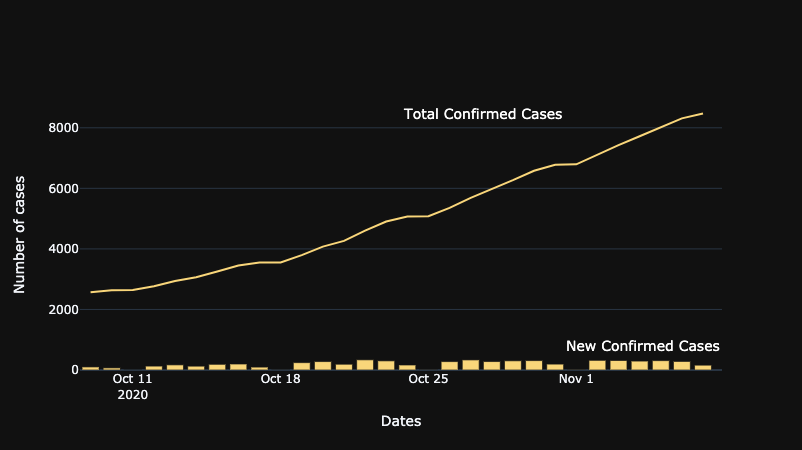

In [133]:
confirmed_cases(all_df[select_df],last_days)

2. **Covid19 Deaths**

In [134]:
def covid_deaths(selected_df,last_days_nb):    
    fig_confirmed = go.Figure()
    fig_confirmed.add_trace(
        go.Scatter(
            x=selected_df['jour'].tail(last_days_nb),
            y=selected_df['dc'].tail(last_days_nb),
            mode="lines",
            line={"color":"#C616C4"},
            showlegend=False,
            #name="Total Confirmed Cases"
        )
    )
    fig_confirmed.add_trace(
        go.Bar(
            x=selected_df['jour'].tail(last_days_nb),
            y=selected_df['new_dc'].tail(last_days_nb),
            marker={"color":"#C616C4"},
            showlegend=False,
            #name="New Confirmed Cases",

        )
    )


    # LINE CHART ANNOTATION
    fig_confirmed.add_annotation(
         x=selected_df['jour'].tail(1).tolist()[0],
         y=selected_df['dc'].tail(1).tolist()[0],
         text="Total Deaths",
         font={"size": 14,"color":"#ffffff"},
         xshift=-220,  # Annotation x displacement!
         showarrow=False,
    )

    # BAR CHART ANNOTATION
    fig_confirmed.add_annotation(
        x=selected_df['jour'].tail(1).tolist()[0],
        y=selected_df['new_dc'].tail(1).max(),
        text="New Deaths",
        font={"size": 14, "color":"#ffffff"},
        xshift=-60,  # Annotation x displacement!
        yshift=20,  # Annotation y displacement!
        showarrow=False,
        )
    fig_confirmed.update_layout(
        template="plotly_dark",
        xaxis={"title":"Dates"},
        yaxis={"title":"Number of deaths"},
        autosize=True,
    )
    fig_confirmed.show()

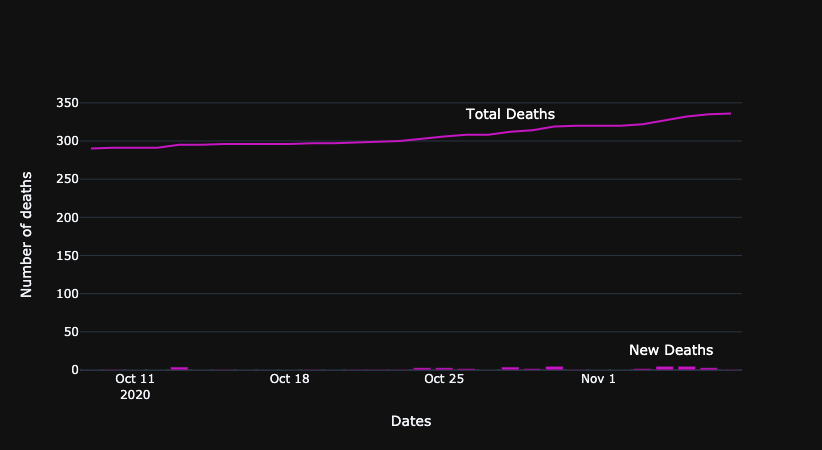

In [135]:
covid_deaths(all_df[select_df],last_days)